In [207]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
housing = fetch_california_housing()


# 9 Ансамблирование

In [208]:
df = pd.read_csv('../../src/heart.csv')

## Анализ массива

### загрузка данных

In [209]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### проверка наличия пропусков в массиве

In [211]:
for col in df.columns:
    if df[col].isnull().sum():
        raise print(f"из None column {col}", df[col].isnull().sum())

### визуализация данных

<Axes: xlabel='HeartDisease', ylabel='count'>

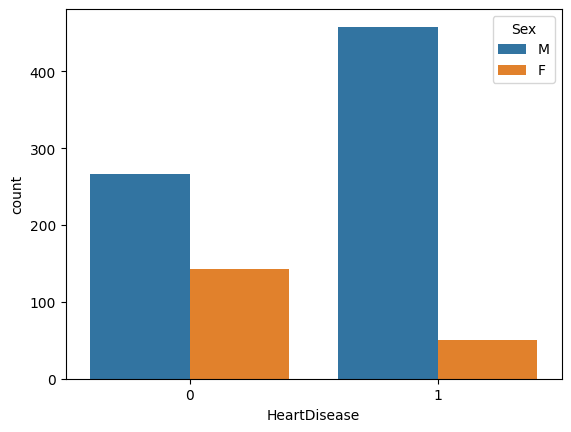

In [212]:
sns.countplot(data=df, x='HeartDisease', hue='Sex')

<Figure size 200x160 with 0 Axes>

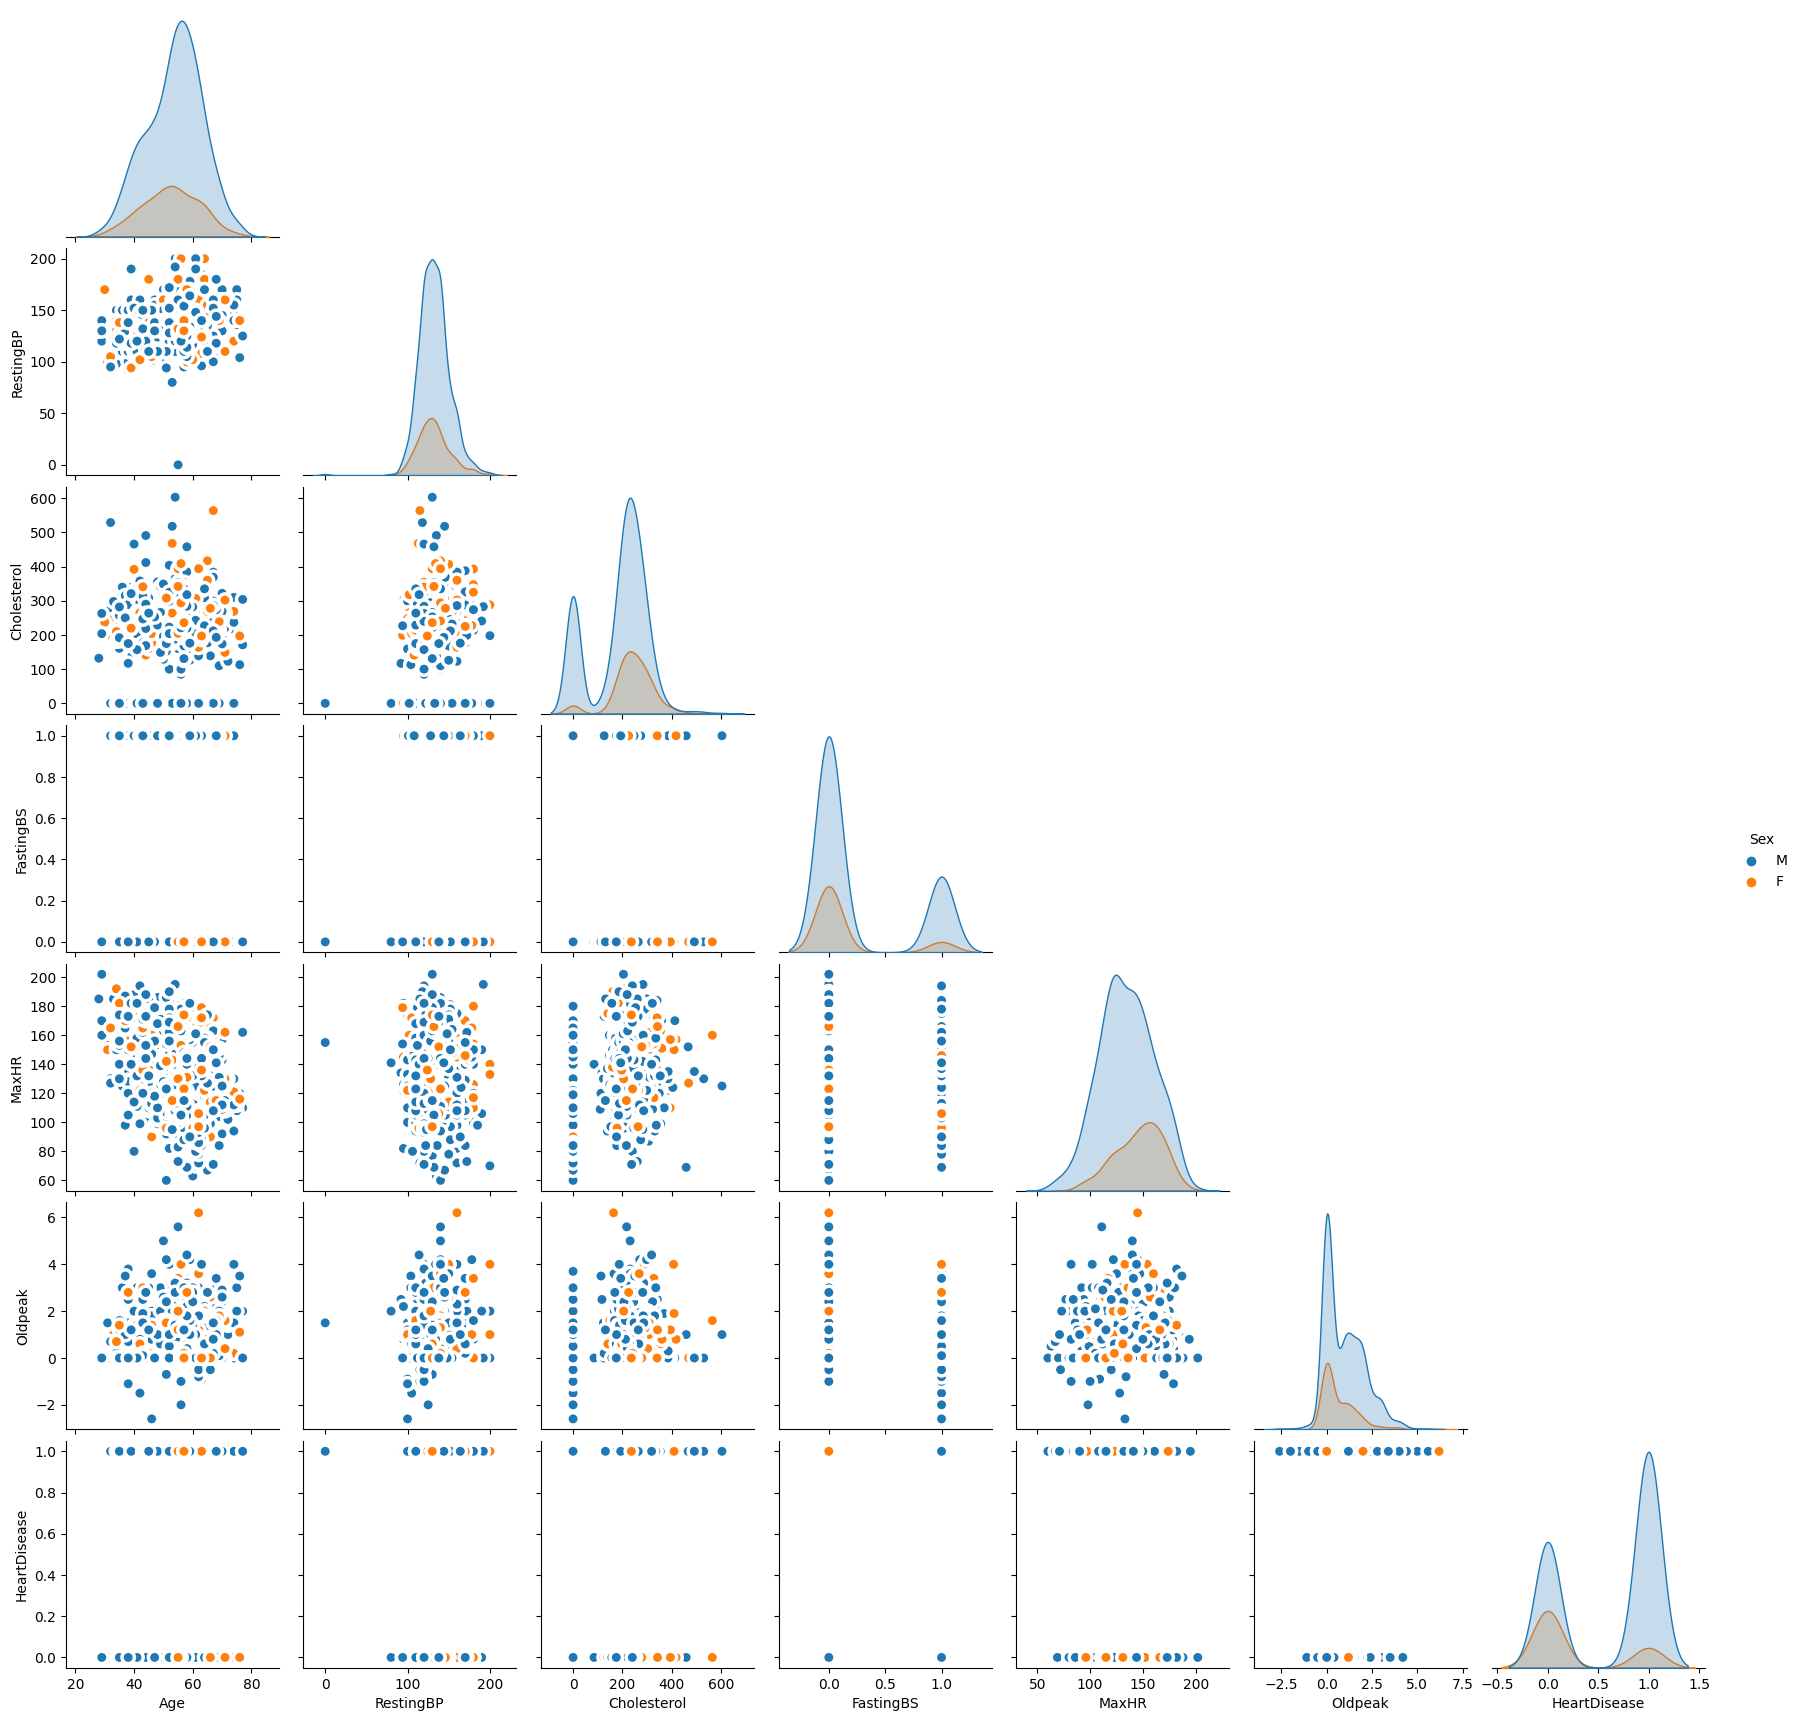

In [213]:
# df = pd.get_dummies(df) * 1
plt.figure(figsize=(5, 4), dpi = 40)
sns.pairplot(df, kind="scatter", hue="Sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5), corner=True)
plt.show()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### разбиение массива на `train` `test`

In [215]:
y = df.HeartDisease
X = df.drop(columns='HeartDisease')
X = pd.get_dummies(X) * 1

In [216]:
# Splitting the Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(734, 20) (184, 20)
(734,) (184,)


### `DecisionTreeClassifier` и определение оптимальной глубины обучения

In [217]:
from sklearn.tree import DecisionTreeClassifier

_score_test, _score_train, _delta, _i = 0, 0, 0, 0
for i in range(1, 15):
    dcTree = DecisionTreeClassifier(max_depth=i)
    dcTree.fit(X_train, y_train)
    train_score = dcTree.score(X_train, y_train)
    test_score = dcTree.score(X_test, y_test)
    if _score_test < test_score:
        _score_test = test_score
        _score_train = train_score
        _delta = train_score - test_score
        _i = i
    print(f"Глубина дерева: {i} | train_score: {train_score:.2f} test_score: {test_score:.2f} | delta: {(train_score - test_score):.2f}")

print('--------------------------------------------------------')
print(f"Максимальный test score: Глубина дерева: {_i} | train_score: {_score_train:.2f} test_score: {_score_test:.2f} | delta: {(_delta):.2f}")

dcTree = DecisionTreeClassifier(max_depth=4)
dcTree.fit(X_train, y_train)

Глубина дерева: 1 | train_score: 0.82 test_score: 0.80 | delta: 0.02
Глубина дерева: 2 | train_score: 0.83 test_score: 0.84 | delta: -0.01
Глубина дерева: 3 | train_score: 0.86 test_score: 0.85 | delta: 0.01
Глубина дерева: 4 | train_score: 0.88 test_score: 0.87 | delta: 0.01
Глубина дерева: 5 | train_score: 0.90 test_score: 0.87 | delta: 0.03
Глубина дерева: 6 | train_score: 0.91 test_score: 0.82 | delta: 0.09
Глубина дерева: 7 | train_score: 0.93 test_score: 0.80 | delta: 0.13
Глубина дерева: 8 | train_score: 0.95 test_score: 0.80 | delta: 0.15
Глубина дерева: 9 | train_score: 0.96 test_score: 0.82 | delta: 0.14
Глубина дерева: 10 | train_score: 0.98 test_score: 0.80 | delta: 0.17
Глубина дерева: 11 | train_score: 0.98 test_score: 0.79 | delta: 0.20
Глубина дерева: 12 | train_score: 0.99 test_score: 0.79 | delta: 0.20
Глубина дерева: 13 | train_score: 1.00 test_score: 0.78 | delta: 0.22
Глубина дерева: 14 | train_score: 1.00 test_score: 0.80 | delta: 0.20
----------------------------

DecisionTreeClassifier(max_depth=4)

In [218]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_dcTr = dcTree.predict(X_train)

y_pred_dcTr_test = dcTree.predict(X_test)
print("DecisionTreeClassifier train", f"{accuracy_score(y_train, y_pred_dcTr):.2f}")
print(classification_report(y_train, y_pred_dcTr))
print(" DecisionTreeClassifier test", f"{accuracy_score(y_test, y_pred_dcTr_test):.2f}")
print(classification_report(y_test, y_pred_dcTr_test))

DecisionTreeClassifier train 0.88
              precision    recall  f1-score   support

           0       0.91      0.80      0.86       333
           1       0.85      0.94      0.89       401

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.88      0.88       734

 DecisionTreeClassifier test 0.87
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [219]:
dcTree_feature_imp = pd.Series(dcTree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
dcTree_feature_imp[dcTree_feature_imp.values != 0]

ST_Slope_Up          0.635848
ChestPainType_ASY    0.089851
Cholesterol          0.082105
Sex_M                0.056156
ExerciseAngina_Y     0.041436
MaxHR                0.036737
Oldpeak              0.025669
FastingBS            0.021343
RestingBP            0.010856
dtype: float64

### `RandomForestClassifier` и определение оптимальной глубины обучения

In [220]:
from sklearn.ensemble import RandomForestClassifier

_score_test, _score_train, _delta, _i = 0, 0, 0, 0
for i in range(1, 15):
    rFC = RandomForestClassifier(n_estimators=1500, max_depth=i)
    rFC.fit(X_train, y_train)
    train_score = rFC.score(X_train, y_train)
    test_score = rFC.score(X_test, y_test)
    if _score_test < test_score:
        _score_test = test_score
        _score_train = train_score
        _delta = train_score - test_score
        _i = i
    print(f"Глубина дерева: {i} | train_score: {train_score:.2f} test_score: {test_score:.2f} | delta: {(train_score - test_score):.2f}")

print('--------------------------------------------------------')
print(f"Максимальный test score: Глубина дерева: {_i} | train_score: {_score_train:.2f} test_score: {_score_test:.2f} | delta: {(_delta):.2f}")

rFC = RandomForestClassifier(n_estimators=1500, max_depth=5)
rFC.fit(X_train, y_train)

Глубина дерева: 1 | train_score: 0.85 test_score: 0.84 | delta: 0.01
Глубина дерева: 2 | train_score: 0.86 test_score: 0.83 | delta: 0.03
Глубина дерева: 3 | train_score: 0.87 test_score: 0.85 | delta: 0.02
Глубина дерева: 4 | train_score: 0.88 test_score: 0.86 | delta: 0.03
Глубина дерева: 5 | train_score: 0.90 test_score: 0.87 | delta: 0.03
Глубина дерева: 6 | train_score: 0.92 test_score: 0.88 | delta: 0.05
Глубина дерева: 7 | train_score: 0.94 test_score: 0.88 | delta: 0.06
Глубина дерева: 8 | train_score: 0.96 test_score: 0.88 | delta: 0.08
Глубина дерева: 9 | train_score: 0.98 test_score: 0.88 | delta: 0.10
Глубина дерева: 10 | train_score: 0.99 test_score: 0.88 | delta: 0.11
Глубина дерева: 11 | train_score: 0.99 test_score: 0.88 | delta: 0.12
Глубина дерева: 12 | train_score: 1.00 test_score: 0.88 | delta: 0.12
Глубина дерева: 13 | train_score: 1.00 test_score: 0.88 | delta: 0.12
Глубина дерева: 14 | train_score: 1.00 test_score: 0.87 | delta: 0.13
-----------------------------

RandomForestClassifier(max_depth=5, n_estimators=1500)

In [221]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_rFC = rFC.predict(X_train)

y_pred_rFC_test = rFC.predict(X_test)
print("RandomForestClassifier train", f"{accuracy_score(y_train, y_pred_rFC):.2f}")
print(classification_report(y_train, y_pred_rFC))
print(" RandomForestClassifier test", f"{accuracy_score(y_test, y_pred_rFC_test):.2f}")
print(classification_report(y_test, y_pred_rFC_test))

RandomForestClassifier train 0.90
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       333
           1       0.89      0.94      0.91       401

    accuracy                           0.90       734
   macro avg       0.91      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734

 RandomForestClassifier test 0.87
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### определение самых значимых метрик для обучения для двух моделей

In [222]:
rFC_feature_imp = pd.Series(rFC.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rFC_feature_imp[rFC_feature_imp.values != 0]

ST_Slope_Up          0.204924
ST_Slope_Flat        0.144415
ExerciseAngina_Y     0.092359
Oldpeak              0.088118
ExerciseAngina_N     0.087300
ChestPainType_ASY    0.080504
Cholesterol          0.062421
MaxHR                0.055602
Age                  0.039255
ChestPainType_ATA    0.025584
Sex_F                0.025496
Sex_M                0.023611
RestingBP            0.023051
FastingBS            0.016423
ChestPainType_NAP    0.009818
ST_Slope_Down        0.006235
RestingECG_LVH       0.005672
RestingECG_Normal    0.003495
RestingECG_ST        0.002931
ChestPainType_TA     0.002787
dtype: float64

<Axes: xlabel='DecisionTreeClassifier', ylabel='Count'>

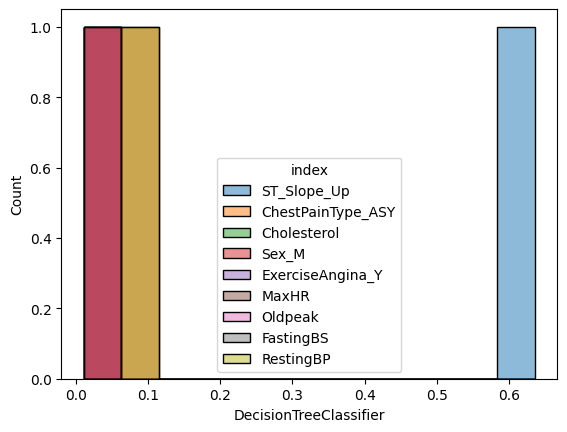

In [223]:
future = pd.concat([dcTree_feature_imp, rFC_feature_imp], axis=1).rename(columns={0:'DecisionTreeClassifier', 1:'RandomForestClassifier'}).reset_index()
sns.histplot(data=future[future['DecisionTreeClassifier'] != 0], x='DecisionTreeClassifier', hue='index')


<Axes: xlabel='RandomForestClassifier', ylabel='Count'>

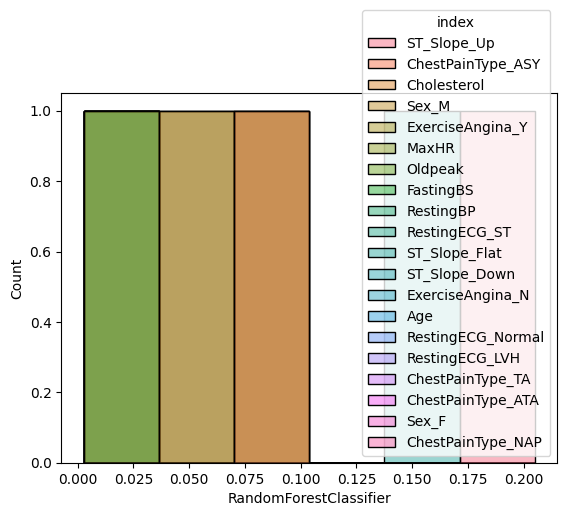

In [224]:
sns.histplot(data=future[future['RandomForestClassifier'] != 0], x='RandomForestClassifier', hue='index')

### Модель с использованием `BaggingClassifier` и вложенной `DecisionTreeClassifier`

In [225]:
from sklearn.ensemble import BaggingClassifier

bg_classifier = BaggingClassifier(dcTree, n_estimators=150, max_samples=0.5, max_features=0.5)
bg_classifier.fit(X_train, y_train)
y_pred_bg_classifier = bg_classifier.predict(X_train)

y_pred_bg_classifier_test = bg_classifier.predict(X_test)
print("BaggingClassifier train", f"{accuracy_score(y_train, y_pred_bg_classifier):.2f}")
print(classification_report(y_train, y_pred_bg_classifier))
print(" BaggingClassifier test", f"{accuracy_score(y_test, y_pred_bg_classifier_test):.2f}")
print(classification_report(y_test, y_pred_bg_classifier_test))

BaggingClassifier train 0.89
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       333
           1       0.87      0.93      0.90       401

    accuracy                           0.89       734
   macro avg       0.89      0.88      0.88       734
weighted avg       0.89      0.89      0.89       734

 BaggingClassifier test 0.87
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### Модель с использованием `StackingClassifier` и `LinearSVC` а так же моделей с предыдущих шагов

In [226]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

estimators = [('dcTree', dcTree), ('rFC', rFC), ('bg_classifier', bg_classifier)]

stakCl = StackingClassifier(estimators=estimators, final_estimator=LinearSVC())
stakCl.fit(X_train, y_train)


d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


StackingClassifier(estimators=[('dcTree', DecisionTreeClassifier(max_depth=4)),
                               ('rFC',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=1500)),
                               ('bg_classifier',
                                BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                                                  max_features=0.5,
                                                  max_samples=0.5,
                                                  n_estimators=150))],
                   final_estimator=LinearSVC())

In [227]:
bg_classifier.fit(X_train, y_train)
y_pred_stakCl = stakCl.predict(X_train)

y_pred_stakCl_test = stakCl.predict(X_test)
print("BaggingClassifier train", f"{accuracy_score(y_train, y_pred_stakCl):.2f}")
print(classification_report(y_train, y_pred_stakCl))
print(" BaggingClassifier test", f"{accuracy_score(y_test, y_pred_stakCl_test):.2f}")
print(classification_report(y_test, y_pred_stakCl_test))

BaggingClassifier train 0.90
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       333
           1       0.89      0.94      0.91       401

    accuracy                           0.90       734
   macro avg       0.90      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734

 BaggingClassifier test 0.85
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [228]:
for i in stakCl.named_estimators:
    print(f'Score on train  with model {i} {stakCl.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {stakCl.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model dcTree 0.8773841961852861
Score on test  with model dcTree 0.8695652173913043
Score on train  with model rFC 0.8991825613079019
Score on test  with model rFC 0.8695652173913043
Score on train  with model bg_classifier 0.8923705722070845
Score on test  with model bg_classifier 0.8858695652173914


### модель `StackingClassifier` без использования предварительно обученных моделей

In [229]:
classifier = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=4)),
        ('RandomForestClassifier', RandomForestClassifier(max_depth=4)),
        ('BaggingClassifier', BaggingClassifier())
    ], LinearSVC())

In [230]:
classifier.fit(X_train, y_train)
y_pred_Regressor = classifier.predict(X_train)

y_pred_Regressor_test = classifier.predict(X_test)
print("BaggingClassifier train", f"{accuracy_score(y_train, y_pred_Regressor):.2f}")
print(classification_report(y_train, y_pred_Regressor))
print(" BaggingClassifier test", f"{accuracy_score(y_test, y_pred_Regressor_test):.2f}")
print(classification_report(y_test, y_pred_Regressor_test))

BaggingClassifier train 0.90
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       333
           1       0.89      0.93      0.91       401

    accuracy                           0.90       734
   macro avg       0.90      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734

 BaggingClassifier test 0.85
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [231]:
for i in classifier.named_estimators:
    print(f'Score on train  with model {i} {classifier.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {classifier.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model DecisionTreeClassifier 0.8773841961852861
Score on test  with model DecisionTreeClassifier 0.8695652173913043
Score on train  with model RandomForestClassifier 0.8896457765667575
Score on test  with model RandomForestClassifier 0.8532608695652174
Score on train  with model BaggingClassifier 0.9945504087193461
Score on test  with model BaggingClassifier 0.842391304347826


### Вывод

1. `DecisionTreeClassifier`
   1. При глубине дерева: `4` | `train_score`: `0.88` `test_score`: `0.87` | delta: `0.01`
2. `RandomForestClassifier`
   1. При глубине дерева: `8` | `train_score`: `0.96` `test_score`: `0.88` | delta: `0.08`
3. Самые значимые метрики,
   при этом `RandomForestClassifier` использует больше метрик как значимых, так как случайно берет каждый раз разные метрики
   (топ параметров для обучения)
   1. `ST_Slope_Up`          
   2. `ST_Slope_Flat`        
   3. `ExerciseAngina_N`     
   4. `ExerciseAngina_Y`     
   5. `ChestPainType_ASY`
4. ✔✔✔ `BaggingClassifier` с пред обученными моделями `BaggingClassifier` `train` `0.90` BaggingClassifier test `0.88`
5. `StackingClassifier` и `LinearSVC` `train` `0.91` и `test` `0.86`
6. `StackingClassifier` без пред обучения  `BaggingClassifier` `test` `0.86` `BaggingClassifier` `test` `0.85`

**ИТОГ**
+ лучше всего показала себя модель `BaggingClassifier` с пред обученной моделью и выбранной и показала хорошие параметры
+ важно применять разные настройки для каждых методов и следить за дисперсией и смещением, а так же пробовать разные варианты настроек в моделях, которых реально много**